# Predicting the price at which a house was sold

This is notebook shows how we can use house data to build a model that predicts the price of a house. We shall use regression techniques in this case to learn/train a model that we shall then use to predict the price of houses.

The dataset used is from [Kaggle](wwe.kaggle.com) and is from one of there earlier running competitions. Here we shall use the training dataset that contains both the houses features and the price at which it was sold. While training, this dataset will be split into training and test datasets.

In [1]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

houses = pd.read_csv('.../train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After loading the database we can then examine it. On looking at it we can see that there are a number of features. Let us look at the shape.

In [2]:
rows, columns = houses.shape
print 'There are %i rows and %i columns'% (rows, columns)

There are 1460 rows and 81 columns


So we have 1460 training examples and 81 different features for each example. We shall the start preprocessing the data before we feed to our regression models.

## Preprocessing the data

### One Hot Encoding of the categorical variables

Many of the features are categorical features that have string values. The machine learning algorithms that we work with take integer values so these will have to be cahnged to integer values. Further more, the machine learning algorithms will need to take into account the categorical nature of these variables plus these integer values now assigned to the features are not menat to be ordinal. There are also some categorical features that have number values whic are also not meant to be taken as actual number values i,e as ordinal numbers.

To cater for all this we use a technique called [One Hot Encoding](http://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/) that uses binary values. The presence of a certain a value for a particular feature is shown using a value of 1 and the rest of the other value are assigned a 0.  This is done feature by feature.

We shall extract the features that are not categorical/ have continuous ordinal values and the apply one_hot encoding to the other features. After scheming through the dataset, I found that the features below were the non-categorical ones.

In [3]:
cont_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
             'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

We shall sepaate these from the categorical features that we shall encode. To ensure the values that we are predicting, the house price is not caught up in this, we shall separate the features/data from the target values. The target values are the last column in the data.

In [4]:
data, target = houses.iloc[:, :-1], houses.iloc[:,-1]

cat_cols = [column for column in data.columns if column not in cont_cols]
categorical = data[cat_cols]
categorical.shape

(1460, 47)

Of the 81 columns there are 47 categorical columns. We then apply one hot encoding to them. We use a pandas method called get_dummies(the one hot result variables are also called dummy variables)

In [5]:
dummy_columns =[]
for column in cat_cols:
    column_dummies = pd.get_dummies(categorical[column].fillna(-99))
    categorical.drop(column, axis=1, inplace=True)
    dummy_columns.append(column_dummies)

categorical_dummies = pd.concat(dummy_columns, axis=1)

print categorical_dummies.shape

print categorical_dummies.columns

(1460, 1767)
Index([         1,          2,          3,          4,          5,          6,
                7,          8,          9,         10,
       ...
         u'ConLw',     u'New',     u'Oth',      u'WD', u'Abnorml', u'AdjLand',
        u'Alloca',  u'Family',  u'Normal', u'Partial'],
      dtype='object', length=1767)


We can see above that the categorical variabes have created many more columns when encoded. We can have a peak below. We can see that is largely a sparse dataset, which is wha we expect.

In [6]:
categorical_dummies.head()

,1,2,3,4,5,6,7,8,9,10,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Preprocessing on the numerical features

We shall merge this one hot encoded data with the rest of the numerical columns. However before we do that, we shall modify those as well. Where number values are concerned and in situations where outliers may exist, it is ofetn useful and worthwhile to use the logarithm versions of the data.

In [7]:
log_ordinal = np.log(data[cont_cols].fillna(0)+1)

We can now combine the preprocessed categorical and numerical features.

In [8]:
features = pd.concat([log_ordinal, categorical_dummies], axis=1)
features.shape

(1460, 1800)

## Training a model for prediction and evalutaing it

Now that we have done some preprocessing, we can now feed this data to a model and predict the houses data. As a reminder, our feature data is now contained in the **features** dataframe and the target variables are in the **target** dataframe.

We start off with using good old Linear Regression.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold

kfold = KFold(n_splits=10)
results = cross_val_score(LinearRegression(), features, target, cv=kfold)
results.mean()

0.83144535548371257

The value given above is the R-squared value (also called the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination)).This shows how good a regression model fits the data. 

In [10]:
results = cross_val_score(LinearRegression(), features, target, cv=kfold, scoring='neg_mean_squared_error')
np.sqrt(np.abs(results.mean()))

33212.890817748659

The value above is the root mean square error (RMSE) of the model. In it is akin to the average difference between the predicted values and the actual values.

We can try this with Ridge and Lasso regression and then finally while using Random Forests of different numbers of trees.

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor

ridge_results = cross_val_score(RidgeCV(), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
lasso_results = cross_val_score(LassoCV(), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
rf_30_results = cross_val_score(RandomForestRegressor(n_estimators=30), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
rf_100_results = cross_val_score(RandomForestRegressor(n_estimators=100), features, target, cv=kfold, scoring= 'neg_mean_squared_error')

print 'RMSE for Ridge regression is %.3f\n' % np.sqrt(np.abs(ridge_results.mean()))
print 'RMSE for Lasso regression is %.3f\n' % np.sqrt(np.abs(lasso_results.mean()))
print 'RMSE for Random Forest regression with 30 trees is %.3f\n' % np.sqrt(np.abs(rf_30_results.mean()))
print 'RMSE for Random Forest regression with 100 trees  is %.3f' % np.sqrt(np.abs(rf_100_results.mean()))


RMSE for Ridge regression is 31416.688

RMSE for Lasso regression is 30615.851

RMSE for Random Forest regression with 30 trees is 30543.981

RMSE for Random Forest regression with 100 trees  is 30086.649


We can see from above tha the Random Forests implementaion gives us the least RMSE. So it would seem to come out as the best.

We can certainly do better than this if we do some feature engineering and/or use polynomial features as well perform scaling on the ordinal features. We can also reduce the features and train using the most useful ones hence removing the noisy variables.

This is our base model though.

## Removal of Outliers

Let us plot Ground Living Area againt the Sale Price as a scatter plot

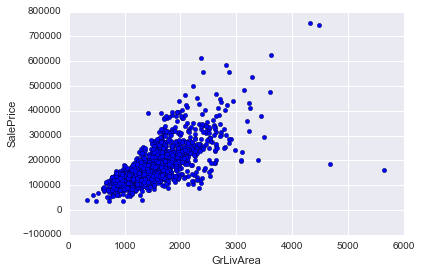

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(houses['GrLivArea'], houses['SalePrice']);
plt.xlabel('GrLivArea');
plt.ylabel('SalePrice');

We notice there are about 4 extreme values. The 2  in the top right of the graph are quite large compared with the rest of the valus however, they follow the general trend of the rest of the data and thus could be special values. The teo on the bottom right however do not follow the trend. They represent very large ground living area that translates to a low  Sale price, which is in sharp contrast with the rest fo the data. We shall remove these on the basis that they are outliers. 

In [13]:
houses = houses.drop(houses[(houses['GrLivArea']>4000)& (houses['SalePrice']<300000)].index)
houses.shape

(1458, 81)

## Examining the Target Variable

Let us plot a histogram to see the distribution of the SalePrice variable

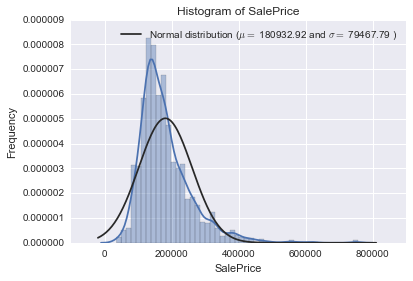

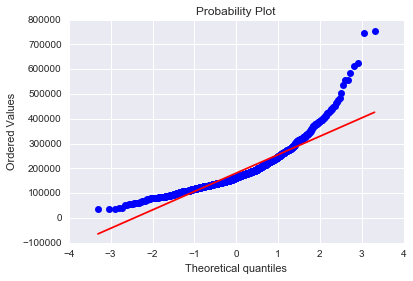

In [14]:
from scipy.stats import norm, skew, probplot
mu, sigma = norm.fit(houses['SalePrice'])
sns.distplot(houses['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(houses['SalePrice'], plot=plt);

We use a histogram with a normal curve of the daa fitted to it to show how it differs from the normal curve. Further below is a probability plot that further shows that the variable diverges from the normal distribution. 

We see that the variable is right-skewed so we shall attempt to rectify this by applying a logarithmic transformation using numpy's log1p method. This applies the equavelent of log(1+x) to the variables where x is a value in the data

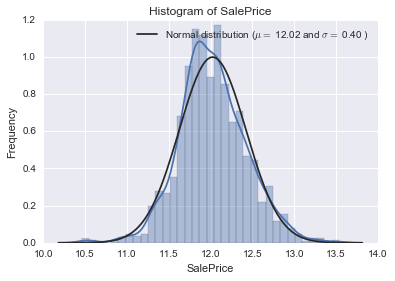

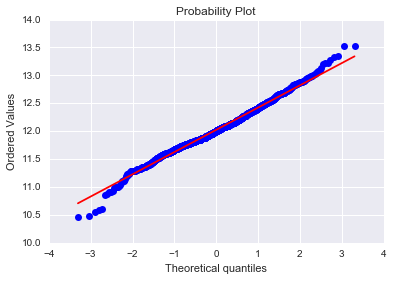

In [15]:
houses['SalePrice'] = np.log1p(houses['SalePrice'])

mu, sigma = norm.fit(houses['SalePrice'])
sns.distplot(houses['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(houses['SalePrice'], plot=plt);

From the two plots above we see we have manage to make the data more normalized and it it estimates a normal distribution of the data. 

## Feature Engineering

As mentioned above, to improvd on our previous models, we need to carry out feature engineering, creation and selection.

First we shall concatenate the train and test data.

In [16]:
test = pd.read_csv('/Users/Elizabeth/Desktop/Datasets/Kaggle - Housing Prices/test.csv')
train_end = houses.shape[0]
entire = pd.concat([houses, test]).reset_index(drop=True)
entire.drop(['Id', 'SalePrice'], axis=1, inplace=True)
print 'Shape of the entire dataset is {}'.format(entire.shape)

Shape of the entire dataset is (2917, 79)


## Dealing with Missing Data

We need to see which features have missing values (NaN values) and which are worst affected to enable us figure out what we should do in each case.

In [17]:
entire_na = (entire.isnull().sum()/entire.shape[0])*100 #get the percentage of NaN values for each feature
entire_na = entire_na[entire_na != 0].sort_values(ascending=False) #remove the  features that don't have any Nan values and sort in descending order  
entire_na.head()
nan_data = pd.DataFrame({'Nan Ratio': entire_na})
nan_data.head(20)

,Nan Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


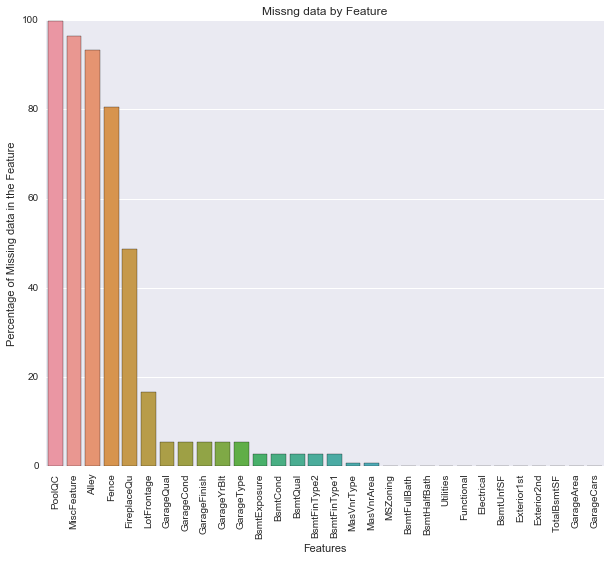

In [18]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=nan_data.head(30).index, y=nan_data.head(30)['Nan Ratio'])
plt.xticks(rotation=90);
plt.ylabel('Percentage of Missing data in the Feature')
plt.xlabel('Features')
plt.title('Missng data by Feature');

## Imputing the missing data

### Missing values that indicate absence of a feature

For a number of the features, no value signifies the absence of a variable. These include PoolQc, MiscFeature, Alley among others. For example, in PoolQC, the absence of a value means that the house has no pool. Likewise a Nan value in MiscFeature means that there is no Miscellaneous feature. For such features, we shall replace Nan with "None" for categorical features. For the numerical ones we shall replace it with 0.

In [19]:
#list of columns whose missing values are to be replaced with None
replace_with_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in replace_with_none:
    entire[col].fillna('None', inplace=True)

#list of columns whose missing values are to be replaced with zero
replace_with_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'] 
for col in replace_with_zero:
    entire[col].fillna(0, inplace=True)

### Filling missing data with the mode

For some of the features where the missing values do not indicate the lack of a feature, we shall use different ways to fill in this missing information. We can use the most common value(mode), the mean or the median value. In this case we shall mainly use the mode. Let's select a list of features where we shall replace the misisng values with the mode.

In [20]:
#list of columns whose missing values are to be replaced with the mode
replace_with_mode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in replace_with_mode:
    entire[col].fillna(entire[col].mode()[0], inplace=True)
  

### Filling missing data with the median 

In the data description, the LotFrontage is described as "Linear feet of street connected to property". It is likely that for every neighborhood, the area of the street connected to the street is similar. We shall then use the median area for each neighhbourhood to fill the missing values

In [21]:
entire.loc[:,'LotFrontage'] = entire.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

### Dealing with the other missing values

The data description further specifies that for the Functional feature, we should assume it is typical unless stated otherwise. We shall replace the NaN values with "Typ".

In [22]:
entire['Functional'].fillna('Typ', inplace= True)

We can then look at the "Utilities" feature.

In [23]:
entire['Utilities'].fillna('Null').value_counts()

AllPub    2914
Null         2
NoSeWa       1
Name: Utilities, dtype: int64

The Utilities feature has almost all values as "AllPub" except for one that is "NoSewa" and two null values. We can safely remove this feature without affecting the variance of the data and the performance of our models.

In [24]:
entire.drop('Utilities', axis=1, inplace=True)

We now now check if there any null values left.

In [25]:
entire_na = (entire.isnull().sum()/entire.shape[0])*100 #get the percentage of NaN values for each feature
entire_na = entire_na[entire_na != 0].sort_values(ascending=False) #remove the  features that don't have any Nan values and sort in descending order  
entire_na.head()
nan_data = pd.DataFrame({'Nan Ratio': entire_na})
nan_data

,Nan Ratio


We see that all the null values have been dealt with.

## Further Feature engineering

### Transforming some numerical features to categorical features

We shall do this by changing the type of the data in the feature from int or float to string

In [26]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    entire.loc[:, col] = entire[col].astype(str)

### Adding an additional feature

We add a feature that is the total of the square footage of the house.

In [27]:
entire['TotalSF'] = entire['TotalBsmtSF'] + entire['1stFlrSF'] + entire['2ndFlrSF']

### Dealing with skewed features

We shall use Box Cox transformation to reduce the skewedness of skewed features. First we look for the highly skewed features.

In [28]:
numerical = entire.dtypes[entire.dtypes != 'object'].index

skewness = entire[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


### Using Scipy for Box Cox transformation

We shall use Box-Cox transformation on the features with high "skewness". We shall use scipy's boxcox1p function, in essence computing a 1+x Box-Cox transformation. We'll use a value of lambda of 0.15.

Our threshold for "skewness" that necessitates transforamtion is 0.75.

In [29]:
(abs(skewness) > 0.75).value_counts()

True     21
False    12
dtype: int64

21 of the numerical features will require transformation.

In [30]:
from scipy.special import boxcox1p

boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
lam = 0.15

for col in boxcox_features:
    entire.loc[:, col] = boxcox1p(entire[col], lam)


In [31]:
skewness2 = entire[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df2 = pd.DataFrame({'Skewness': skewness2})
skewness_df2.head(10)

,Skewness
PoolArea,15.759529
3SsnPorch,8.921650
LowQualFinSF,8.741030
MiscVal,5.594963
BsmtHalfBath,3.786685
KitchenAbvGr,3.697303
ScreenPorch,2.977052
BsmtFinSF2,2.563235
EnclosedPorch,2.024321
TotRmsAbvGrd,0.749232


## Correlation of the different variabes (including the target variable)

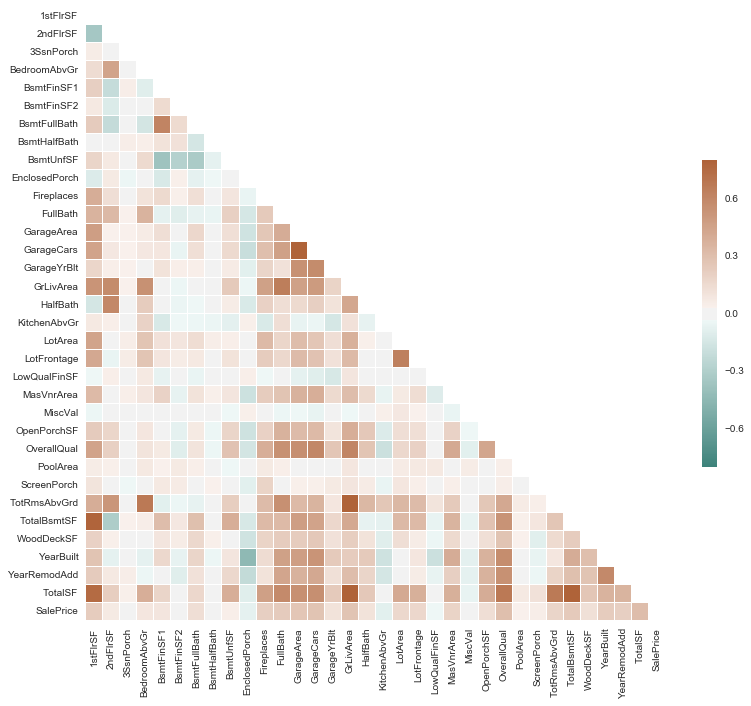

In [32]:
train= pd.concat([entire.iloc[:train_end, :], houses['SalePrice']], axis=1)
train_corr = train.corr()

mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(180, 30, as_cmap=True)
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(train_corr, vmax=.8, mask=mask, cmap=cmap, cbar_kws={'shrink':.5}, linewidth=.01);

## Creating dummy variables (One -Hot Encoding)

The models we shall use do not take strings but only accept numbers. Hence we shall have to transform them to numbers. In this case, order to preserve their categorical nature, we have to create dummy variables for our categorical features. This is also called one-hot encoding.

We use pandas' "get_dummies" method.

In [33]:
dummy_entire = pd.get_dummies(entire)

Finally we split the data again into the train and test data before modelling.

In [34]:
train = dummy_entire.iloc[:train_end, :]
test  = dummy_entire.iloc[train_end:, :]

## Creating a model and making predictions

Now that we have done some work on our data, mainly in terms of feature engineering, we expect the models we use on it to do better. We shall use the same algorithms we used on it earlier on so that we can make a direct comparison.

In [35]:
y_train = houses['SalePrice'].values

ridge_results = cross_val_score(RidgeCV(), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
lasso_results = cross_val_score(LassoCV(), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
rf_30_results = cross_val_score(RandomForestRegressor(n_estimators=30), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
rf_100_results = cross_val_score(RandomForestRegressor(n_estimators=100), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')

print 'RMSE for Ridge regression is %.3f\n' % np.sqrt(np.abs(ridge_results.mean()))
print 'RMSE for Lasso regression is %.3f\n' % np.sqrt(np.abs(lasso_results.mean()))
print 'RMSE for Random Forest regression with 30 trees is %.3f\n' % np.sqrt(np.abs(rf_30_results.mean()))
print 'RMSE for Random Forest regression with 100 trees  is %.3f' % np.sqrt(np.abs(rf_100_results.mean()))

RMSE for Ridge regression is 0.111

RMSE for Lasso regression is 0.189

RMSE for Random Forest regression with 30 trees is 0.142

RMSE for Random Forest regression with 100 trees  is 0.138


Wow, the models are so much better after this. Over a thousand times more accurate. We can try different algorithms and see how well they do. We can also apply scaling and the addition of polynomial features. These may improve the performance.

This time we see that Ridge regression prdocuces the lowest RMSE. WE can use this for prediction on new unseen data(like the test data).